# <b> TPC - EXERCÍCIO 8 DA FOLHA 2 </b>

## Física Computacional - PL 2

## 01-11-2021

<hr>

Anabela Sampaio Pereira (a92849) 

Beatriz Sousa Demétrio (a92839)

Carlos Miguel Passos Ferreira (a92846)



### ENUNCIADO : 
Implemente um código geral para resolver sistemas lineares de equações utilizando o método de eliminação de Gauss. 
Verifique o código comparando com a resolução analítica de:

$ 3x + 2y = 5$ 

$ x + y = 3 $


## RESOLUÇÃO:
O objetivo deste exercício é implementar o método de eliminação de Gauss e testá-lo usando o exemplo em cima.

O método de eliminação de Gauss consiste em substituir o sistema linear inicial por sistemas cada vez mais simples, sempre "equivalentes" ao original, ou seja, faz isto transformando a matriz estendida do sistema numa matriz triangular superior. Ora, ele pode ser generalizado para resolver sistemas lineares de $m$ equações e $n$ incógnitas. 

Basicamente, aplicando o método de eliminação de Gauss vamos ter o seguinte:


$\begin{bmatrix} a_{11} & \cdots & a_{1n} & b_1 \\ \vdots & \ddots & \vdots & \vdots \\ a_{m1} & \cdots & a_{mn} & b_m \\ \end{bmatrix}$
aplicando o método de Gauss vamos ter a matriz seguinte: $\begin{bmatrix} a_{11} & \cdots & a_{1n} & b_1 \\ \vdots & \ddots & \vdots & \vdots \\ 0 & \cdots & a'_{mn} & b'_m \\ \end{bmatrix}$
onde $ a'_{ij} = a_{ij} - \frac{a_{i1}}{a_{11}} a_{1j} $ e $ b'_i = b_i - \frac{a_{i1}}{a_{11}} b_1 $, sendo que $ i = 2, \cdots , m $ e $ j = 2, \cdots , m $.


Antes de apresentarmos o código para a resolução do exercício, iremos proceder à resolução manual do exercício, isto é, iremos proceder à resolução do exercício explicando passo-a-passo para se entender melhor o código. Para fazer isto iremos utilizar o exemplo em cima.

### Exemplo:
$ 3x + 2y = 5$ 

$ x + y = 3 $

### <b> 1º Passo: </b> colocar o sistema linear inicial sobre a forma de uma matriz

$\begin{pmatrix} 3&2\\1&1\end{pmatrix}$ $\begin{pmatrix} x\\y \end{pmatrix}$ $=$ $\begin{pmatrix} 5\\3 \end{pmatrix}$

onde a matriz $\begin{pmatrix} 3&2\\1&1\end{pmatrix}$ é a matriz dos coeficientes, onde os seus elementos são designados de <b> elementos pivô </b>; a matriz $\begin{pmatrix} x\\y \end{pmatrix}$ é a matriz que contém as incógnitas correspondentes na qual nós chamamos de <b> variáveis pivô </b>. Às restantes variáveis designamos por <b> variáveis livres </b>.

Para ser mais fácil na resolução, iremos utilizar uma única matriz, isto é:

$\begin{bmatrix} 3&2&|&5\\1&1&|&3\end{bmatrix}$

### <b> 2º Passo: </b> determinar o determinante da matriz dos coeficientes

Para podermos aplicar o método de eliminação de Gauss, temos que determinar o determinante da matriz dos coeficientes e verificar que o mesmo é diferente de zero. Ora vejamos se isso realmente se verifica:

$\begin{pmatrix} 3&2\\1&1\end{pmatrix}$ tem como determinante: 3 $ \times $ 1 - 1 $ \times $ 2 = 1, que é diferente de 0. Logo, podemos aplicar o método de eliminação de Gauss.

### <b> 3º Passo: </b>  ir eliminando as incógnitas até à última equação do sistema tiver apenas uma incógnita, ou seja, tal como dissemos em cima, iremos substituir o sistema inicial por sistemas mais simples e equivalentes.

Dois sistemas dizem-se equivalentes se todas as soluções de um deles (e só essas) forem também soluções do outro. Temos três situações aonde isso pode acontecer:
-   se um for obtido do outro por alteração da ordem de duas das suas equações:

$L_i \leftrightarrow L_j $

NOTA: no caso de $a_{11} = 0$, deve-se trocar as linhas de forma a que o coeficiente da incógnita $x$ da nova 1ª equação seja diferente de zero.

-  se um for obtido do outro por multiplicação de uma das suas equações por um escalar (diferente de zero):

$L_i \leftarrow \alpha L_i $, onde $\alpha \ne 0$

-   se a uma das suas equações for adicionado (ou subtraído) um múltiplo da outra equação:

$L_i \leftarrow L_i + \alpha L_j $



Portanto, aplicando estes três pontos vamos ter o seguinte:

-  $\begin{bmatrix} 3&2&|&5\\1&1&|&3\end{bmatrix}$ $\rightarrow$ $\begin{bmatrix} 1&1&|&3\\3&2&|&5\end{bmatrix}$
($ L_1 \leftrightarrow L_2 $)




-  $\begin{bmatrix} 1&1&|&3\\3&2&|&5\end{bmatrix}$ $\rightarrow$ $\begin{bmatrix} 1&1&|&3\\0&-1&|&-4\end{bmatrix}$
($ L_2 \leftarrow L_2 - 3 \times L_1 $)

Basicamente, ficamos com o sistema da seguinte forma:

$ x + y = 3$

$ -y = -4$

ou seja, vamos ter que como solução: $ x = - 1 $ e $ y = 4 $ (isto é, no código, ao aplicarmos este exemplo temos que obter este resultado).

Passando agora esta resolução para o código pedido vamos ter o seguinte:

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from math import *

Para a resolução deste problema iremos recorrer ao método das substituições retroativas que é um método usado para resolver sistemas triangulares superiores. Tais sistemas são resolvidos por substituições retroativas, por meio de equações da
forma:

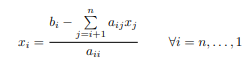

In [6]:
def substituicoes_retroativas(A,b):
  
  n=len(A) #n será a ordem da matriz A
  
  x=n*[0] #iniciar o vetor x com tamanho n e elementos iguais a 0
  
  for i in range(n-1, -1, -1):  #Vai percorrer todas as linhas da matriz da última para a primeira
    S=0 #Somatório
    
    for j in range(i+1,n):   #Este ciclo for será utilizado para fazer o somatório
        S=S+A[i][j]*x[j]
    
    x[i]=(b[i]-S)/A[i][i]   #Depois de obtido o valor do somatório podemos agora resolver a equação das substituições retroativas
  
  return x

Agora que temos a implementação de um método que permite resolver sistemas traingulares superiores, precisamos de um método que transforme um qualquer sistema num triangular superior. Esse método que procuramos denomina-se método de eliminação de Gauss, que consiste em eliminar todos os elementos abaixo da diagonal, percorrendo todas as colunas desde a 1ª até à penúltima.
 



In [7]:
def gauss(A, b):
    '''Executa o método da eliminação de Gauss para resolver o sistema  linear Ax=b 
    transformando o sistema em um sistema triangular superior equivalente.
    Parâmetros de entrada: A é uma matriz quadrada de ordem n e b é o vetor constante.
    Saída: vetor x
    '''

    ## n é a ordem da matriz A
    n = len(A)

    ## Começamos por percorrer todas as colunas de)de a 1ª até à penúltima 
    for k in range(0,n-1):
        
        ## Iremos percorrer cada todas as linhas abaixo da diagonal principal
        for i in range(k+1,n):
            
            ## Calcula o fator m. Dividir o elemento pelo pivô
            m=-A[i][k]/A[k][k]
            
            ## Atualiza a linha i da matriz, percorrendo todas as colunas j
            for j in range(k+1,n):
                A[i][j]=m*A[k][j]+A[i][j]
            
            # Atualiza o vetor b na linha i
            b[i]=m*b[k]+b[i]
           
            ## Finalmente podemos igual Aik a 0
            A[i][k]=0
    
    
    ## Agora resolvemos o sistema triangular superior usando as substituições retroativas
    x = substituicoes_retroativas(A, b)
    
    return x

Definidas as funções responsáveis pela resolução e desenvolvimento do problema, iremos agora escrever um código responsável por pedir os valores da matriz dos coeficientes:

In [8]:
# recolha da quantidade de variáves, que corresponderá à quantidade de linhas da matriz dos coeficientes
var = int(input('Indique a quantidade de variáveis: '))

# o numero de colunas será igual à 'quantidade de linhas' por alocar também as variáveis livres
col = var

#criação de uma matriz onde serão armazenados os valores dos coeficientes e um vetor onde serão armazenados as variáveis livres
matriz =  np.zeros((var, col))

c_l = []

#recolha dos valores 

for l in range (0, var):
    for c in range (0, col+1):
        if c < var:
            matriz[l][c] = float(input('Indique o ' + str(c+1) +'º coeficiente da ' +  str(l+1) + 'ºequação: '))
        else:
            c_l.append(float(input('Insira o coeficiente de grau zero da ' + str(l+1) + 'ºequação: ')))

#print(matriz)
#print(c_l)


# chamada da função gauss, caso o determinante da matriz dos coeficientes seja diferente de 0

if np.linalg.det(matriz) == 0:
        print('Sistema sem solução definida, o determinante da matriz dos coeficientes é nulo!')
else:
    res = gauss(matriz, c_l)

    # apresentação dos resultados
    print ('A solução do sistema é:')

    for i in range(0, var):
        print (('x' + str(i+1)) + ' = '+ str(res[i])) 

[[3.         2.        ]
 [0.         0.33333333]]
A solução do sistema é:
x1 = -1.0
x2 = 4.0
